<a href="https://www.kaggle.com/code/whisperingrock/univariable-linear-regression?scriptVersionId=130613359" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import math, copy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
# Getting data from csv
df = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
x_train = df['x'].to_numpy()
y_train = df['y'].to_numpy()
m = x_train.shape[0] # 700 counted
z = x_train.shape[0] # 700 counted
#print(m)
#print(z)

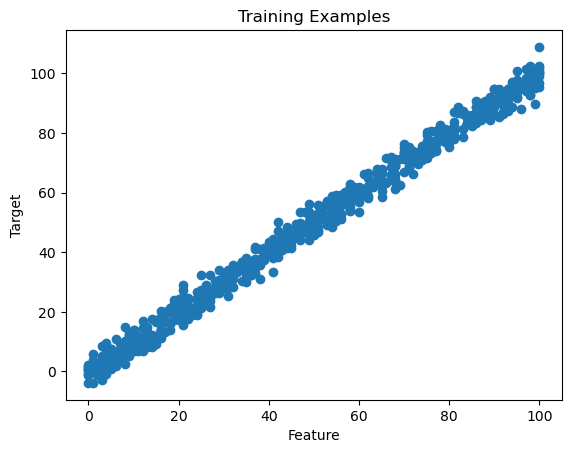

Feature : Target
24.0 : 21.54945196
50.0 : 47.46446305
15.0 : 17.21865634
38.0 : 36.58639803
87.0 : 87.28898389
36.0 : 32.46387493
12.0 : 10.78089683
81.0 : 80.7633986
25.0 : 24.61215147
5.0 : 6.963319071
16.0 : 11.23757338
16.0 : 13.53290206
24.0 : 24.60323899
39.0 : 39.40049976
54.0 : 48.43753838
60.0 : 61.69900319
26.0 : 26.92832418
73.0 : 70.4052055
29.0 : 29.34092408
31.0 : 25.30895192
68.0 : 69.02934339
87.0 : 84.99484703
58.0 : 57.04310305
54.0 : 50.5921991
84.0 : 83.02772202
58.0 : 57.05752706
49.0 : 47.95883341
20.0 : 24.34226432
90.0 : 94.68488281
48.0 : 48.03970696
4.0 : 7.08132338
25.0 : 21.99239907
42.0 : 42.33151664
0.0 : 0.329089443
60.0 : 61.92303698
93.0 : 91.17716423
39.0 : 39.45358014
7.0 : 5.996069607
21.0 : 22.59015942
68.0 : 61.18044414
84.0 : 85.02778957
0.0 : -1.28631089
58.0 : 61.94273962
19.0 : 21.96033347
36.0 : 33.66194193
19.0 : 17.60946242
59.0 : 58.5630564
51.0 : 52.82390762
19.0 : 22.1363481
33.0 : 35.07467353
85.0 : 86.18822311
44.0 : 42.63227697
5.0 : 

In [3]:
# Visual of the training data set
plt.close()
plt.scatter(x_train, y_train)
#plt.margins(0.2, 0.5)
plt.title('Training Examples')
plt.ylabel('Target')
plt.xlabel('Feature')
plt.show()

print("Feature : Target")
for i in range(m):
    if x_train[i] > 100 or x_train[i] < 0:
        print(f"{x_train[i]} : {y_train[i]} <-------------- Error")
    else:
        print(f"{x_train[i]} : {y_train[i]}")
    
x_range = (np.amin(x_train), np.amax(x_train))
y_range = (np.amin(y_train), np.amax(y_train))
print(f"Data range of Features : {x_range}")
print(f"Data range of Targets : {y_range}")

**There exists an error in the data : a large feature with no corresponding target. 
The data range of the feature should be 0-100 as prescribed by the Author, not [0, 3530.15].
The target range is also effected here. **


In [4]:
# looking for outliers in the code
err_lst = []

for i in range(m):
    if x_train[i] > 100 or x_train[i] < 0:
        err_lst.append(i)
        
print(f"Training set location with bad data: {err_lst}")

# Cleaned Data
for i in range(len(err_lst)):
    x_train_c = np.delete(x_train, err_lst[i])
    y_train_c = np.delete(y_train, err_lst[i])
m_c = x_train_c.shape[0]

    
# Checking min/max of data
x_range_c = (np.amin(x_train_c), np.amax(x_train_c))
y_range_c = (np.amin(y_train_c), np.amax(y_train_c))
print(f"Data range of corrected features : {x_range_c}")
print(f"Data range of corrected targets : {y_range_c}")

Training set location with bad data: [213]
Data range of corrected features : (0.0, 100.0)
Data range of corrected targets : (-3.83998112, 108.8716183)


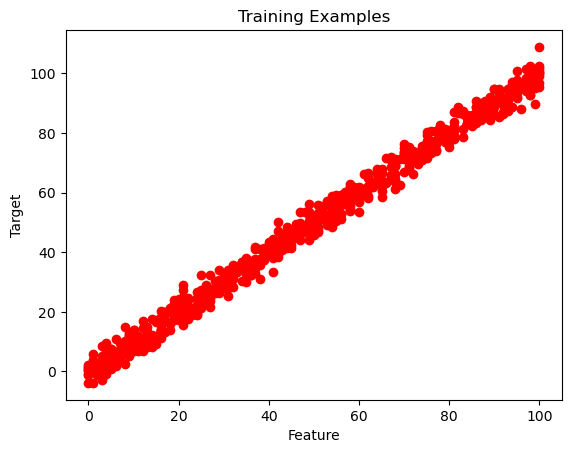

In [5]:
# Visual of the training data set
plt.close()
plt.scatter(x_train_c, y_train_c, c = 'r')
plt.title('Training Examples')
plt.ylabel('Target')
plt.xlabel('Feature')
plt.show()

In [6]:
def compute_model_output(x, w, b):
    '''
    Purpose : computes the output of a linear model
    Args :
        x (n-dimensional array of size m (ndarray(m,))) : Feature, m examples
        w, b (scalar)                                   : model param
    Returns : 
        y (ndarray (m,))                                : Target, m examples
    '''
    
    m = x.shape[0] #example size
    f_wb = np.zeros(m) # create target array of size m with zeros
    
    for i in range (m):
        f_wb[i] = w*x[i] + b
        
    return f_wb

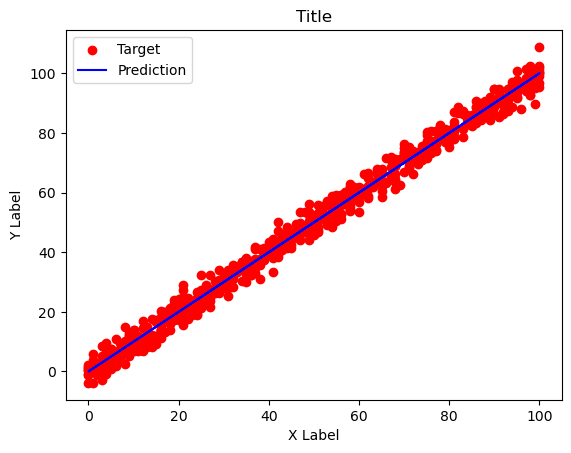

In [7]:
# some inital guessing
b = 0
w = 1
tmp_f_wb = compute_model_output(x_train_c, w, b) 

plt.close()


# Plot the training set as well
plt.scatter(x_train_c, y_train_c, c='r', label='Target')
# Plot the prediction 
plt.plot(x_train_c, tmp_f_wb, c='b', label='Prediction')

# Graph Options
plt.title("Title")
plt.ylabel('Y Label')
plt.xlabel('X Label')
plt.legend()




plt.show()


In [8]:
def compute_cost(x, y, w, b):
    """
    Purpose : Computes the cost function for linear regression
    Args : 
        x (ndarray (m,)) : Feature, m examples
        y (ndarray (m,)) : Target, m examples
        w,b (scalar)     : tunable model param
    Returns : 
        total_cost (float) : The cost of using w,b as the param for linear regression to fit the data points in x to y
    """
    
    m = x.shape[0]
    cost_sum = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum = cost_sum + cost
        
    total_cost = (1/(2*m)) * cost_sum
    
    return total_cost

In [9]:
# Trying out the cost function
w = 1
b = 0

local_cost = compute_cost(x_train_c, y_train_c, w, b)
print(f'The current cost of param (w={w}, b={b}) is {local_cost}')

The current cost of param (w=1, b=0) is 3.936827140184711


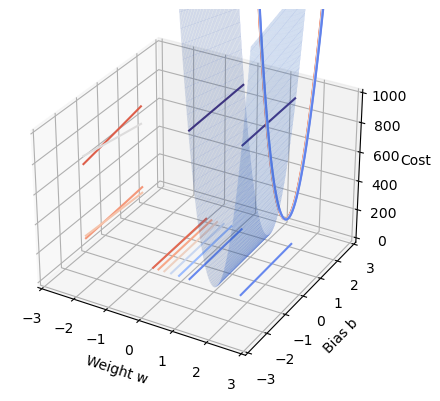

In [10]:
#Visualizing the cost function contours
xcoor_weight, ycoor_bias = np.meshgrid(np.linspace(-1, 2, 1024), np.linspace(-1, 2, 1024))
z_cost = compute_cost(x_train_c, y_train_c, xcoor_weight, ycoor_bias)
levels = np.linspace( 0, np.max(z_cost), 1000)

ax =  plt.figure().add_subplot(projection='3d')

ax.plot_surface(xcoor_weight, ycoor_bias, z_cost, edgecolor='royalblue', lw=0.02, rstride=10, cstride=10,
                alpha=0.1)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(xcoor_weight, ycoor_bias, z_cost, zdir='z', offset=0, cmap='coolwarm')
ax.contour(xcoor_weight, ycoor_bias, z_cost, zdir='x', offset=-3, cmap='coolwarm')
ax.contour(xcoor_weight, ycoor_bias, z_cost, zdir='y', offset=3, cmap='coolwarm')

ax.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-10, 1000),
       xlabel='Weight w', ylabel='Bias b', zlabel='Cost')

ax.contour(xcoor_weight, ycoor_bias, z_cost)
# Graph Options
#plt.title("Contour of Cost Function")

plt.show()

Weight has a large impact on the cost but the bias has a small influence on cost.

In [11]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        #if i%10 == 0:      # prevent resource exhaustion 
        J_history.append( cost_function(x, y, w , b))
        p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

Iteration    0: Cost 1.92e+02  dj_dw: -3.335e+03, dj_db: -4.994e+01   w:  1.334e+00, b: 1.99759e-02
Iteration    1: Cost 2.51e+01  dj_dw:  1.120e+03, dj_db:  1.681e+01   w:  8.862e-01, b: 1.32529e-02
Iteration    2: Cost 6.32e+00  dj_dw: -3.760e+02, dj_db: -5.602e+00   w:  1.037e+00, b: 1.54937e-02
Iteration    3: Cost 4.20e+00  dj_dw:  1.262e+02, dj_db:  1.922e+00   w:  9.861e-01, b: 1.47250e-02
Iteration    4: Cost 3.97e+00  dj_dw: -4.238e+01, dj_db: -6.043e-01   w:  1.003e+00, b: 1.49667e-02
(w,b) found by gradient descent: (  1.0031,  0.0150)


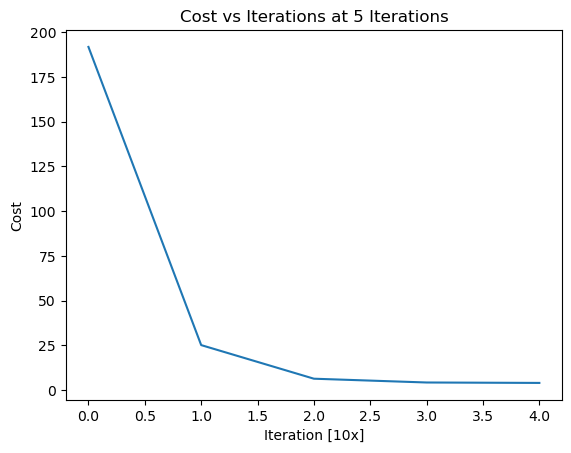

In [13]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 5
tmp_alpha = 4e-4
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train_c ,y_train_c, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

plt.plot(range(len(J_hist)), J_hist)
plt.title(f"Cost vs Iterations at {iterations} Iterations")
plt.ylabel('Cost')
plt.xlabel('Iteration [10x]')
plt.show()



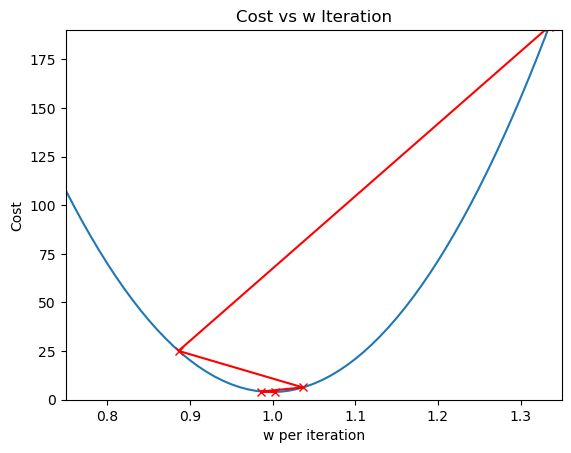

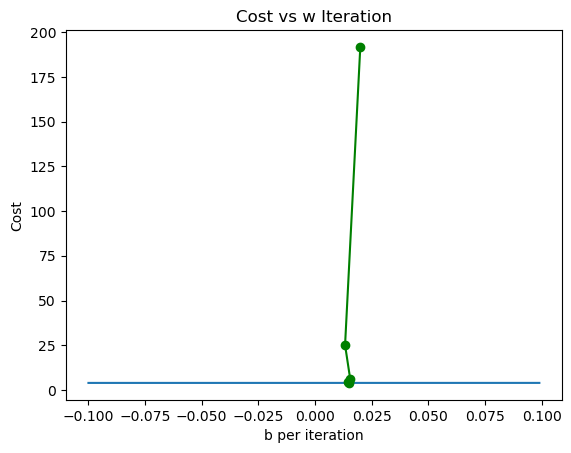

In [14]:
# Checking how the learning rate bounces around cost vs w

w_fill=np.arange(0, 2, 0.01)
b_fill=np.arange(-.1, .1, 0.001)
j_w_zero = np.zeros(w_fill.shape[0])
j_b_zero = np.zeros(b_fill.shape[0])

for i in range(w_fill.shape[0]):
    j_w_zero[i] = compute_cost(x_train_c, y_train_c, w_fill[i], 0)
    j_b_zero[i] = compute_cost(x_train_c, y_train_c, 1, b_fill[i])   # the slope here definitely matters here [INVESTIGATE]
    



w_lst = np.zeros(len(p_hist))
b_lst = np.zeros(len(p_hist))
for i in range(len(p_hist)):
    w_lst[i] = p_hist[i][0]
    b_lst[i] = p_hist[i][1]
    
fig, ax = plt.subplots()
ax.plot(w_fill, j_w_zero)
ax.plot(w_lst, J_hist, c='r', marker='x')
ax.set(ylabel='Cost', xlabel ='w per iteration', title = "Cost vs w Iteration", xlim=(0.75, 1.35), ylim=(0, 190))
plt.show()


plt.plot(b_fill, j_b_zero)
    

plt.plot(b_lst, J_hist, c='g', marker='o')
#plt.plot(p_hist, J_hist, c='g')
plt.title(f"Cost vs w Iteration")
plt.ylabel('Cost')
plt.xlabel('b per iteration')
plt.show()






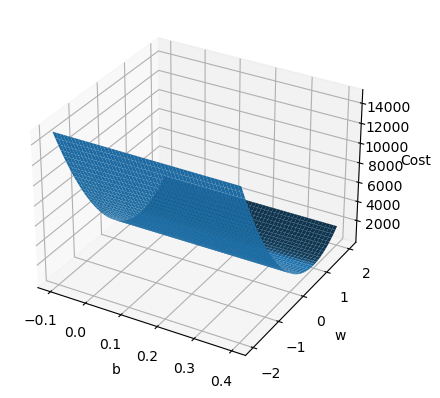

In [15]:
# STILL TRYING TO GRAPH A 3D PLOT OF (b, w, J(w,b))
b = np.linspace(-0.1, 0.4, 500)
w = np.linspace(-2, 2, 500)

W, B = np.meshgrid(w, b)

Z = compute_cost(x_train_c, y_train_c, W, B)
        
        
ax = plt.axes(projection="3d")
# Plot the surface.
ax.plot_surface(B, W, Z)
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.set_zlabel('Cost')
plt.show()
    


In [16]:
#Applying the model to the new data
df = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')
x_test = df['x'].to_numpy()
y_test = df['y'].to_numpy()
m_test = x_test.shape[0] 

In [17]:
# Calculate the cost of the test data set with out tuned param
y_hat = np.zeros(m_test)
y_hat = compute_model_output(x_test, w_final, b_final)
test_cost = compute_cost(x_test, y_hat, w_final, b_final)
print(f'The predicted cost is {test_cost:2.6f} with w = {w_final:2.6f} and b = {b_final:2.6f}.')

# param for reference
y_guess = compute_model_output(x_test, 1, 0)
guess_cost = compute_cost(x_test, y_hat, 1, 0)
print(f'The guessed cost is {guess_cost:2.6f} with w = {1} and b = {0} ')

print(f"Manual output of a single set: f_w,b({x_test[5]}) = {(x_test[5] * w_final) + b_final}")

The predicted cost is 0.000000 with w = 1.003087 and b = 0.014967.
The guessed cost is 0.018686 with w = 1 and b = 0 
Manual output of a single set: f_w,b(15) = 15.061270995651997


Coefficients: [1.00065638] Intercept:  [-0.10726546]
Manual output of a single set: f_w,b(15) = [14.90258026]


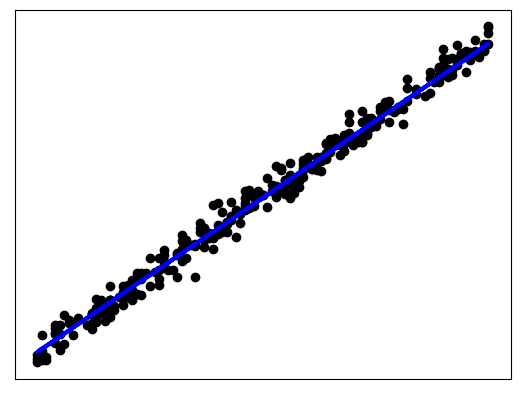

In [18]:
# Scikit-tool for closed-form linear regression
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

#reshaping data
x_train_copy = x_train_c.reshape(-1, 1)
y_train_copy = y_train_c.reshape(-1, 1)
x_test_copy = x_test.reshape(-1, 1)
y_test_copy = y_test.reshape(-1, 1)

# Train the model using the training sets
regr.fit(x_train_copy, y_train_copy)

# The coefficients
w_sci = regr.coef_
b_sci = regr.intercept_
print("Coefficients:", w_sci[0], "Intercept: ", b_sci)
print(f"Manual output of a single set: f_w,b({x_test[5]}) = {(x_test[5] * w_sci[0]) + b_sci}")

# Make predictions using the testing set
y_hat = regr.predict(x_test_copy)

# Plot outputs
plt.scatter(x_test_copy, y_test_copy, color="black")
plt.plot(x_test_copy,y_hat, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()





The difference in weight and bias could refer to the number of iterations (5) manually set. It is unknown at the moment how scikit performs linear regression.